활성화함수
  - 계단함수
    - 임계치가 넘어가면 1 그렇지 않으면 0 (비 연속적)
  - 시그모이드
    - 0 ~ 1사이의 연속적인 값으로 변경(연속적)
    - 기울기 소멸문제(미분값이 매우 작아짐)
      - 학습이 안됨(뉴런이 비활성화)
  - 렐루
    - 0보다크면 입력받은 그대로 출력, but 0으로 수렴
    - 입력이 음수이면 출력이 0, 그래서 일부 뉴런이 비활성화 됨
  - 리키렐루
    - 음수인경우 아주작은 값을 더해서 0가 되는것을 방지

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


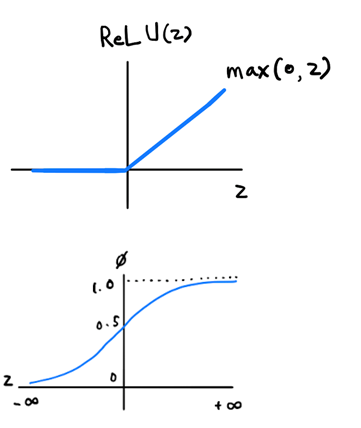

In [3]:
# 데이터 : 패션 mnist
# 신경망 : 심층신경망
# 활성화 함수 : relu

In [4]:
from tensorflow import keras

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

활성화 함수로 relu 적용

In [7]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


컴파일 - 어떻게 학습할 것인지

In [8]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

학습

In [9]:
model.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5149 - accuracy: 0.8190
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3477 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3294 - accuracy: 0.8826
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3166 - accuracy: 0.8873


옵티마이져
  - https://wikidocs.net/152765

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5005 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3770 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3413 - accuracy: 0.8766
Epoch 4/5
1

손실곡선

In [11]:
type(history.history)

dict

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

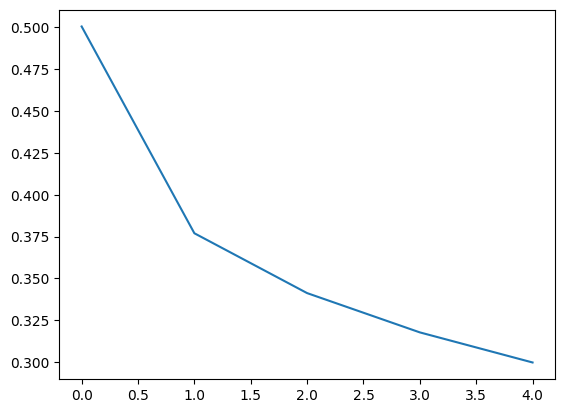

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.show()

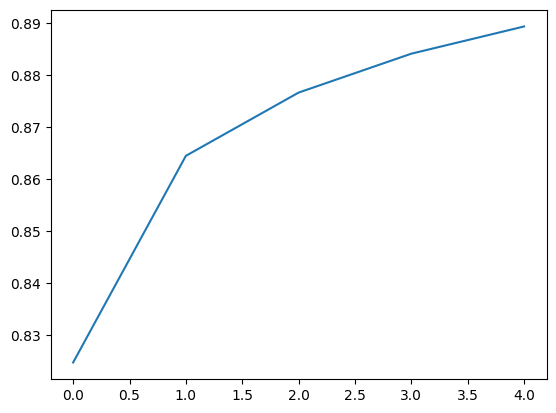

In [14]:
plt.plot(history.history['accuracy'])
plt.show()

더 많은 에포크

In [15]:
history = model.fit(x_train_scaled,y_train,epochs=20,verbose=0)

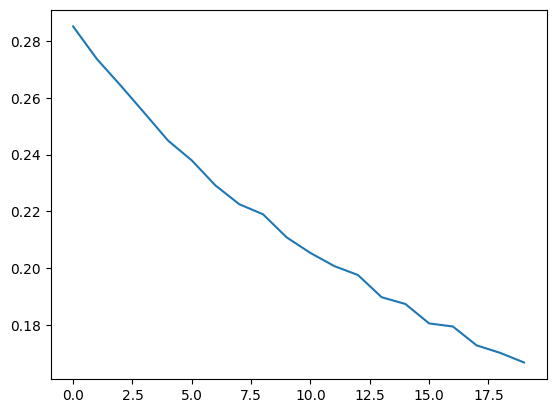

In [16]:
plt.plot(history.history['loss'])
plt.show()

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5064 - accuracy: 0.8254 - val_loss: 0.4650 - val_accuracy: 0.8266
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3849 - accuracy: 0.8609 - val_loss: 0.4070 - val_accuracy: 0.8501
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3451 - accuracy: 0.8741 - val_loss: 0.3791 - val_accuracy: 0.8645
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.8838 - val_loss: 0.3713 - val_accuracy: 0.8680
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3002 - accuracy: 0.8894 - val_loss: 0.3495 - val_accuracy: 0.8741
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2849 - accuracy: 0.8939 - val_loss: 0.3473 - val_accuracy: 0.8751
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2742 - accuracy: 0.8981 - val_loss: 0.3715 - val_accuracy:

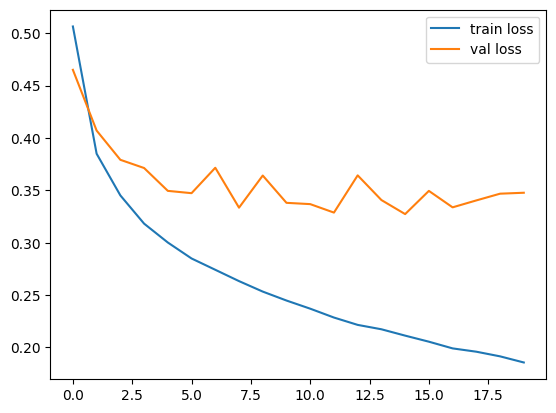

In [18]:
plt.plot(history.history['loss'],label='train loss')
# plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'],label='val loss')
# plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()


Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5057 - accuracy: 0.8193 - val_loss: 0.4361 - val_accuracy: 0.8486
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3771 - accuracy: 0.8642 - val_loss: 0.4001 - val_accuracy: 0.8581
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3452 - accuracy: 0.8762 - val_loss: 0.4073 - val_accuracy: 0.8630
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3272 - accuracy: 0.8830 - val_loss: 0.3763 - val_accuracy: 0.8732
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3137 - accuracy: 0.8889 - val_loss: 0.3814 - val_accuracy: 0.8746
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3058 - accuracy: 0.8923 - val_loss: 0.4232 - val_accuracy: 0.8560
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2959 - accuracy: 0.8949 - val_loss: 0.3714 - val_accuracy:

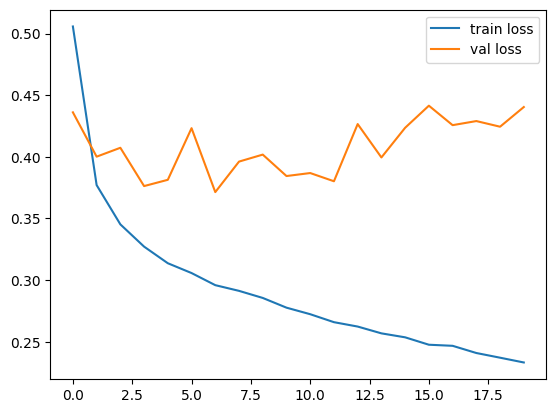

In [19]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

신경망 의 규제
  - 패널티를 부여해서 학습이 과도한 학습을 방지


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5654 - accuracy: 0.7998 - val_loss: 0.4664 - val_accuracy: 0.8330
Epoch 2/20
1875/1875 [================

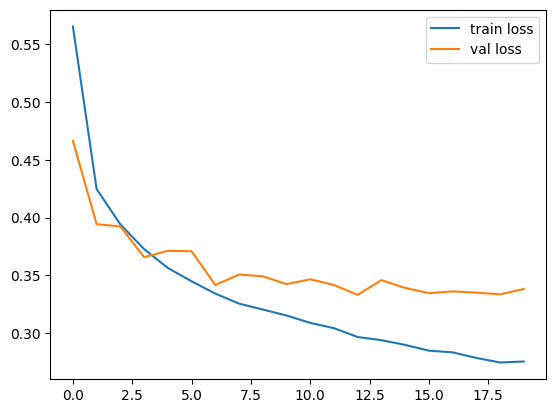

In [20]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,validation_data=(x_test_scaled,y_test) )
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

모델 저장
  - 가중치만 저장
    - 모델구조를 동일하게 만들고 불러와함
  - 전체저장
    - 그냥 불러옴

In [21]:
model.save_weights('/content/drive/MyDrive/deepLearning/model-weight.h5')

In [22]:
model.save('/content/drive/MyDrive/deepLearning/model-all.h5')

불러오기

In [23]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10,activation='softmax'))

In [24]:
# 해당모델에 가중치 적용하기
model.load_weights('/content/drive/MyDrive/deepLearning/model-weight.h5')

In [25]:
import numpy as np
np.mean(np.argmax(model.predict(x_test_scaled),axis=1) == y_test)

313/313 [==============================] - 1s 2ms/step


0.8863

불러오기2

In [26]:
model_all = keras.models.load_model('/content/drive/MyDrive/deepLearning/model-all.h5')

In [27]:
model_all.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3381 - accuracy: 0.8863


[0.3381183445453644, 0.8863000273704529]

In [28]:
np.mean(np.argmax(model_all.predict(x_test_scaled),axis=-1) == y_test)

313/313 [==============================] - 1s 2ms/step


0.8863

CallBack
  - 사건(event)가 발생하면 실행되는 함수
  - 때가되면 실행된다(사용자가 호출안함)



In [31]:
from keras.api._v2.keras import callbacks
cb = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/deepLearning/model-all.h5')
hist = model_all.fit(x_train_scaled,y_train,epochs=20,
               validation_data=(x_test_scaled,y_test),
               callbacks=[cb])

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2714 - accuracy: 0.8963 - val_loss: 0.3335 - val_accuracy: 0.8836
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2623 - accuracy: 0.9007 - val_loss: 0.3330 - val_accuracy: 0.8853
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.8993 - val_loss: 0.3418 - val_accuracy: 0.8822
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2617 - accuracy: 0.9003 - val_loss: 0.3329 - val_accuracy: 0.8862
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2596 - accuracy: 0.9019 - val_loss: 0.3263 - val_accuracy: 0.8879
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2571 - accuracy: 0.9029 - val_loss: 0.3417 - val_accuracy: 0.8845
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2572 - accuracy: 0.9027 - val_loss: 0.3412 - val_accuracy

In [35]:
# cb_stop = keras.callbacks.EarlyStopping(patience=2restore)
cb_stop = keras.callbacks.EarlyStopping(patience=2)

Early Stop(조기종료)

In [36]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)) )
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history =  model.fit(x_train_scaled,y_train,epochs=20,
                     validation_data=(x_test_scaled,y_test),
                     callbacks=[cb,cb_stop])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5007 - accuracy: 0.8247 - val_loss: 0.4240 - val_accuracy: 0.8503
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3810 - accuracy: 0.8640 - val_loss: 0.3881 - val_accuracy: 0.8619
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3414 - accuracy: 0.8762 - val_loss: 0.3744 - val_accuracy: 0.8663
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3179 - accuracy: 0.8842 - val_loss: 0.3642 - val_accuracy: 0.8704
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2996 - accuracy: 0.8909 - val_loss: 0.3541 - val_accuracy: 0.8721
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2851 - accuracy: 0.8948 - val_loss: 0.3599 - val_accuracy: 0.8695
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.8998 - val_loss: 0.3815 - val_accuracy

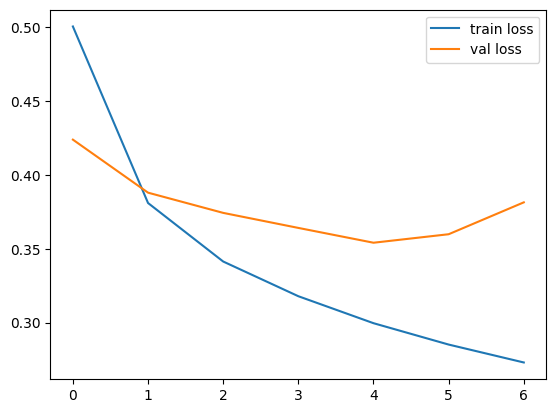

In [37]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

딥러닝 프로세스
  - 층을만든다
  - layers
  - Dense층 - DNN
    - 한개(단순) - ANN
    - 여러개(심층) - DNN
  - 모델
    - 층을 결합
      - Sequence